In [1]:
import pandas as pd
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR, SVR

%matplotlib inline

### Implement the model

In [2]:
# define root directory of the data and the file...
root_dir = '/home/alex/Documents/capstone-ml/'
file = 'data_complete_1d.csv'

# read the data
ask_data = pd.read_csv(root_dir+file, low_memory=True, index_col = 0)

In [3]:
# get a first glance of the data
ask_data.tail()

,open,high,low,close,close-1,close-2,close-3,close-4,SMA5,SMA8,SMA13,EMA12,EMA26
Date,,,,,,,,,,,,,
2017-06-26,1.11997,1.12198,1.11716,1.11828,1.11996,1.11791,1.11495,1.11667,1.116628,1.116995,1.117918,1.117895,1.116128
2017-06-27,1.11827,1.13493,1.11800,1.13367,1.11828,1.11996,1.11791,1.11495,1.117554,1.117030,1.117773,1.117954,1.116288
2017-06-28,1.13367,1.13910,1.12915,1.13783,1.13367,1.11828,1.11996,1.11791,1.120954,1.118691,1.118845,1.120372,1.117575
2017-06-29,1.13783,1.14455,1.13767,1.14393,1.13783,1.13367,1.11828,1.11996,1.125530,1.121615,1.120146,1.123058,1.119076
2017-06-30,1.14393,1.14445,1.13921,1.14107,1.14393,1.13783,1.13367,1.11828,1.130734,1.125400,1.121888,1.126269,1.120917


In [4]:
ask_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 2009-06-08 to 2017-06-30
Data columns (total 13 columns):
open       2237 non-null float64
high       2237 non-null float64
low        2237 non-null float64
close      2237 non-null float64
close-1    2237 non-null float64
close-2    2237 non-null float64
close-3    2237 non-null float64
close-4    2237 non-null float64
SMA5       2237 non-null float64
SMA8       2237 non-null float64
SMA13      2237 non-null float64
EMA12      2237 non-null float64
EMA26      2237 non-null float64
dtypes: float64(13)
memory usage: 244.7+ KB


In [5]:
# extract the features from the dataframe, drop everything but the features and assign a copy of it ...
features = ask_data.drop(['high','low','open','close'], axis = 1).copy()

# create training and test dataset
X_train = np.array(features[:-500].values)
y_train = np.array(ask_data['close'][:-500].values)
X_test = np.array(features[-500:].values)
y_test = np.array(ask_data['close'][-500:].values)

# check it make sense
X_train.shape

(1737, 9)

In [6]:
from sklearn.svm import LinearSVR, SVR
# define a linear SVR 
clf = LinearSVR(random_state = 88)

In [7]:
# fit the data and save it as the model
model = clf.fit(X_train, y_train)
# predict the next close
predictions = model.predict(X_test)

In [8]:
# get the scores  of the simple model
print('Linear SVR Score: '+str(model.score(X_test, y_test)))
print('Linear SVR MSE: '+str(mean_squared_error(y_test, predictions)))
print('Linear SVR MAE: '+str(mean_absolute_error(y_test, predictions)))

Linear SVR Score: 0.887224890598
Linear SVR MSE: 8.16983187095e-05
Linear SVR MAE: 0.00746367026588


### Refine the model

In [9]:
# import gridsearch and define some well known parameters which Gridsearch tries out on the SVR algorithm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf', 'poly') ,
              'C':[0.1, 1, 10, 100, 10000],
              'degree':[2,3,4,5,6],
              'epsilon':[0, 0.1, 0.01, 0.001]}
svr = SVR()
clf = GridSearchCV(svr, parameters, verbose = 2)


In [ ]:
# put Gridsearch to work
clf.fit(X_train, y_train)

In [ ]:
# get the paramers which Gridsearch found
clf.best_params_

In [ ]:
# ut of curiosity
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_index_)


In [11]:
# define the model with best parameters
svr = SVR(kernel='linear', C = 100, epsilon = 0.001)

In [12]:
# fit the data
svr.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
# get the predictions and dccument the metrics
predictions = svr.predict(X_test)
print('Linear SVR Score: '+str(svr.score(X_test, y_test)))
print('Linear SVR MSE: '+str(mean_squared_error(y_test, predictions)))
print('Linear SVR MAE: '+str(mean_absolute_error(y_test, predictions)))
svr.score(X_test, y_test)

Linear SVR Score: 0.9507140626
Linear SVR MSE: 3.57044940408e-05
Linear SVR MAE: 0.00446390494111


0.95071406260009539

In [ ]:
# define a new SVR model, for another round oof gridsearch to further refine
lsvr = SVR(kernel = 'linear')

In [ ]:
# get Gridsearch and define some parameters near previous found best ones
from sklearn.model_selection import GridSearchCV
parameters = {'C':[50, 100, 200, 500, 1000, 2000, 5000],
              'epsilon':[0.01, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}

clf = GridSearchCV(lsvr, parameters, verbose = 2)

In [ ]:
# let figure Gridsearch out the best parameters
clf.fit(X_train, y_train)

In [ ]:
# get the parameters
clf.best_params_

In [17]:
# define with found best parameters
svr = SVR(kernel = 'linear', C = 100, epsilon = 0.001)
# fit the data
svr.fit(X_train, y_train)
# predict the next days close
predictions = svr.predict(X_test)
# documents the metrics
print('Linear SVR Score: '+str(svr.score(X_test, y_test)))
print('Linear SVR MSE: '+str(mean_squared_error(y_test, predictions)))
print('Linear SVR MAE: '+str(mean_absolute_error(y_test, predictions)))

Linear SVR Score: 0.9507140626
Linear SVR MSE: 3.57044940408e-05
Linear SVR MAE: 0.00446390494111


In [ ]:
# a final round of refinement
lsvr = SVR(kernel = 'linear')

In [ ]:
# get Gridsearch and define some parameters near previous found best ones
from sklearn.model_selection import GridSearchCV
parameters = {'C':[10, 20, 30, 40, 50, 60],
              'epsilon':[0.005, 0.001, 0.0008]}

clf = GridSearchCV(lsvr, parameters, verbose = 2)

In [ ]:
# let Gridsearch find them
clf.fit(X_train, y_train)

In [ ]:
# document the parameters
clf.best_params_

In [15]:
# define with found best parameters
svr = SVR(kernel = 'linear', C = 50, epsilon = 0.0008)
# fit the data
svr.fit(X_train, y_train)
# predict the next days close
predictions = svr.predict(X_test)
# documents the metrics
print('Linear SVR Score: '+str(svr.score(X_test, y_test)))
print('Linear SVR MSE: '+str(mean_squared_error(y_test, predictions)))
print('Linear SVR MAE: '+str(mean_absolute_error(y_test, predictions)))

Linear SVR Score: 0.950428289882
Linear SVR MSE: 3.59115180085e-05
Linear SVR MAE: 0.00447258320504


### Evaluate the model

In [16]:
# create an empty dataframe
evaluation = pd.DataFrame()

In [18]:
# get the true values
evaluation['true'] = ask_data['close'][-500:].copy()
# get the predictions in, make sure from the right model (C=100, epsilon = 0.001)
evaluation['predictions'] = predictions
# get yeterdays close
evaluation['yesterday'] = ask_data['close-1'].copy()
# calculate the difference between predictions and yesterdays close
evaluation['diff'] = evaluation['predictions'] - evaluation['yesterday']
# calculate the difference between real values and yesterdays close
evaluation['diff_true'] = evaluation['true'] - evaluation['yesterday']
# check if it makes sense...
evaluation.head()

,true,predictions,yesterday,diff,diff_true
Date,,,,,
2015-08-06,1.09221,1.090024,1.09030,-0.000276,0.00191
2015-08-07,1.09492,1.092357,1.09221,0.000147,0.00271
2015-08-10,1.10155,1.095110,1.09492,0.000190,0.00663
2015-08-11,1.10417,1.101169,1.10155,-0.000381,0.00262
2015-08-12,1.11546,1.103957,1.10417,-0.000213,0.01129


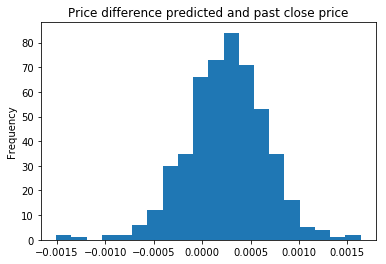

In [20]:
# histogram for deviation
plt.figure()
evaluation['diff'].plot.hist(bins = 20)
plt.title('Price difference predicted and past close price')
plt.show()

In [21]:
evaluation['diff'].mean()

0.0002444145859805431

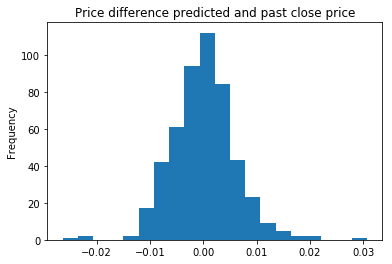

In [22]:
# histogram for deviation
plt.figure()
evaluation['diff_true'].plot.hist(bins = 20)
plt.title('Price difference predicted and past close price')
plt.show()

In [23]:
evaluation['diff_true'].mean()

0.00010154008865356445

In [25]:
# define a condition in order to evaluate the model further
more_than_eight_up = evaluation[(evaluation['predictions'] - evaluation['yesterday']) >= 0.0008].copy()
more_than_eight_down = evaluation[(evaluation['predictions'] - evaluation['yesterday']) <= -0.0008].copy()

more_than_ten_up = evaluation[(evaluation['predictions'] - evaluation['yesterday']) >= 0.0010].copy()
more_than_fifteen_up = evaluation[(evaluation['predictions'] - evaluation['yesterday']) >= 0.0015].copy()

In [26]:
#mean_squared_error(more_than_ten_up['true'].values, more_than_ten_up['predictions'].values)
#mean_squared_error(more_than_fifteen_up['true'].values, more_than_fifteen_up['predictions'].values)
#mean_squared_error(more_than_twenty_up['true'].values, more_than_twenty_up['predictions'].values)
print('MSE more/equal 8 points up: ', mean_squared_error(more_than_eight_up['true'].values, more_than_eight_up['predictions'].values))
print('MSE more/equal 8 points up: ', mean_squared_error(more_than_eight_down['true'].values, more_than_eight_down['predictions'].values))

MSE more/equal 8 points up:  2.53954339741e-05
MSE more/equal 8 points up:  5.58127943979e-05


accuracy for >= 8:  0.42857142857142855
Approximately simple strategy:  6.02006912223e-05
Approximately simple strategy with SL:  0.0533204660416


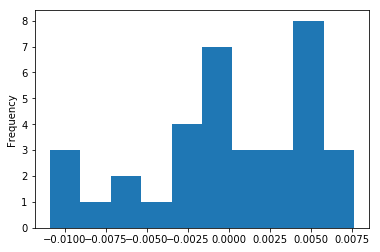

In [27]:
# the difference between the true value and yesterdays close given the condition in the predicted value
diff_true = (more_than_eight_up['true'] - more_than_eight_up['yesterday']).values
# in case the difference is greater than the condition (0.0008), the true value agrees with the prediction,
# therefore 1, if not 0
result = [1 if value >= 0.0008 else 0 for value in diff_true]
# for a simple strategy, sum up all the differences, no matter how much potential loss
simple_prof = (more_than_eight_up['true'].values-more_than_eight_up['yesterday'].values)
# set a stop loss
stop_prof = [prof if prof > -0.0010 else -0.0010 for prof in simple_prof]

# document the results
print('accuracy for >= 8: ', sum(result) * 1.0 / len(result))
print('Approximately simple strategy: ', sum(simple_prof))
print('Approximately simple strategy with SL: ', sum(stop_prof))
(more_than_eight_up['true'].values-more_than_eight_up['yesterday']).plot.hist()

accuracy for <= 8:  0.8
Approximately simple strategy:  0.00820004940033
Approximately simple strategy with SL:  0.0194800367355


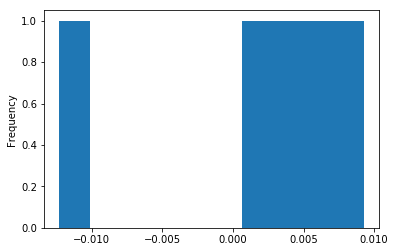

In [28]:
# the difference between the true value and yesterdays close given the condition in the predicted value
diff_true = (more_than_eight_down['true'] - more_than_eight_down['yesterday']).values
# in case the difference is less than the condition (-0.0008), the true value agrees with the prediction,
# therefore 1, if not 0
result = [1 if diff <= -0.0008 else 0 for diff in diff_true]
# for a simple strategy, sum up all the differences, no matter how much potential loss
simple_prof = (more_than_eight_down['yesterday'].values-more_than_eight_down['true'].values)
# set a stop loss
stop_prof = [prof if prof > -0.0010 else -0.0010 for prof in simple_prof]

# document the results
print('accuracy for <= 8: ', sum(result) * 1.0 / len(result))
print('Approximately simple strategy: ', sum(simple_prof))
print('Approximately simple strategy with SL: ', sum(stop_prof))

(more_than_eight_down['yesterday'].values-more_than_eight_down['true']).plot.hist()

### Compare the models

In [31]:
# curiosity, check correlation and compare to the ARIMA model
from scipy.stats.stats import pearsonr
pearsonr(evaluation['true'], evaluation['predictions'])

(0.97533533900821445, 0.0)

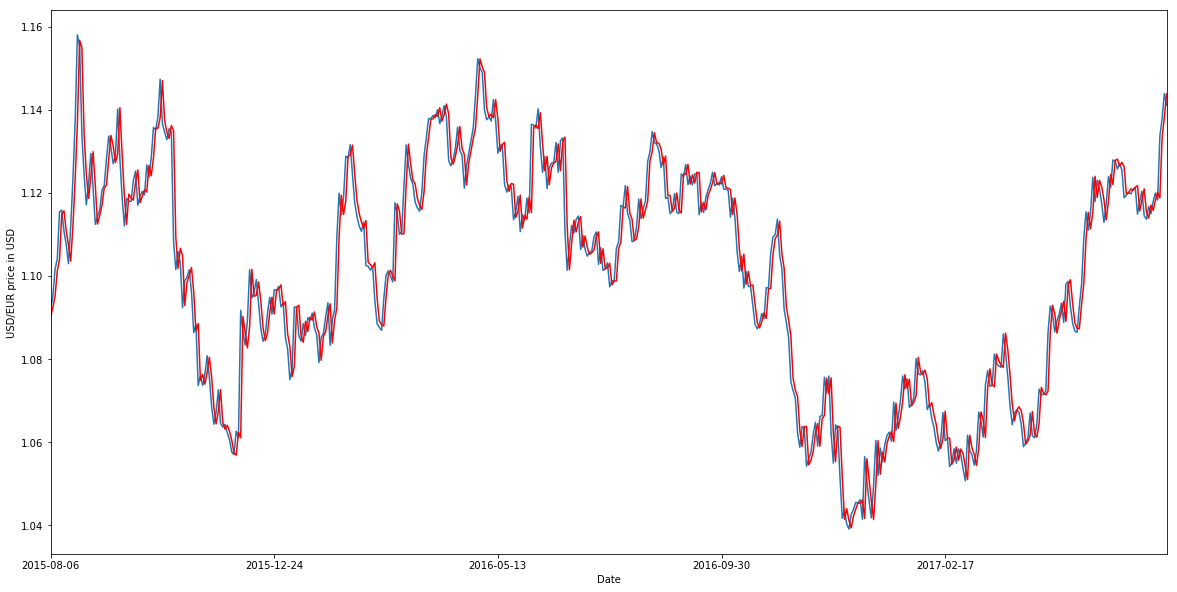

In [30]:
# plot the predictions and true values
plt.figure(figsize = (20,10))
plt.xlabel("Date")
plt.ylabel("USD/EUR price in USD")
evaluation['true'].plot()
evaluation['predictions'].plot(color = 'red')